#### Хомюк Григорий Александрович, БПМ161
### ЛАБОРАТОРНАЯ РАБОТА 3.
### РЕШЕНИЕ СИСТЕМ ЛИНЕЙНЫХ АЛГЕБРАИЧЕСКИХ УРАВНЕНИЙ ПРЯМЫМИ МЕТОДАМИ. ТЕОРИЯ ВОЗМУЩЕНИЙ


##### Задание 3.1.27
##### Дана система уравнений Ax=b порядка n. Исследовать зависимость погрешности решения x от погрешностей правой части системы b.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

n=6 #размерность 
N=27 #компоненты вектора свободных членов
def c(i,j): #коэффициенты для элементов матрицы А
    return 0.1*N*i*j

def gauss (A,b): #функция для метода Гаусса
    M=copy.copy(A) 
    s=copy.copy(b)
    x=np.zeros(n)
    
    #прямой ход
    for j in range(n):
        for i in range(j+1,n):
            mu=M[i,j]/M[j,j] #коэффициент
            M[i]-=M[j]*mu 
            s[i]-=s[j]*mu
            
    #обратный ход        
    x[n-1]=s[n-1]/M[n-1,n-1]
    
    for j in range(n-2,-1,-1):
        l=0
        for i in range(n-1-j):
            l+=(x[n-1-i]*M[j,n-1-i])
        x[j]=(s[j]-l)/M[j,j]
    return(x)

In [130]:
#Зададим матрицу А и вектор свободных членов
A=np.array([[350/((5+0.35*c(i,j))**3) for i in range(n)] for j in range(n)])
b=np.array([float(N) for i in range(n)])

In [140]:
#ищем решение с помощью написанной функции
x1=gauss(A,b)
x1.reshape(6,1)

array([[ 9.64293214],
       [-0.        ],
       [ 0.        ],
       [-0.        ],
       [ 0.        ],
       [-0.        ]])

In [141]:
#ищем решение с помощью встроенной функции solve 
x2=np.linalg.solve(A,b)
x2.reshape(6,1)

array([[ 9.64293214],
       [-0.        ],
       [-0.        ],
       [ 0.        ],
       [-0.        ],
       [ 0.        ]])

In [142]:
#ищем число обусловленности матрицы А
np.linalg.cond(A)

432398.4128820571

In [153]:
#зададим произвольную величину погрешности
eps=0.00001
d=np.zeros(n)
x=copy.copy(x1) #решение из п1 как точное
for i in range(n):
    b1=copy.copy(b)
    b1[i]+=eps
    xi=np.linalg.solve(A,b1)
    d[i]=max(x-xi)/max(x) # вектор относительных погрешностей решений
d.reshape(6,1)


array([[1.23503556e-05],
       [4.85668270e-04],
       [6.75729057e-03],
       [1.67824103e-02],
       [2.76433287e-02],
       [9.52996989e-03]])

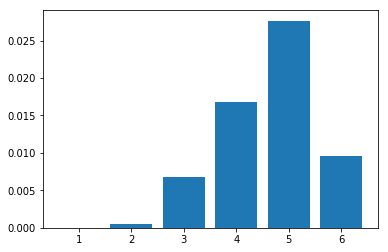

0.02764332865955184  - max погрешность у  5  - i  компоненты


In [154]:
#построим гистограмму
xh=np.arange(1,n+1) #компонента
yh=d #погрешности

plt.bar(xh,yh)
plt.show()

print(max(d),' - max погрешность у ',np.where(d==max(d))[0][0]+1,' - i  компоненты')

In [159]:
#оценим теоретически погрешность решения 
print(np.linalg.cond(A)*eps)
#сравним со значениями практической погрешности
for i in range(n):
    print(d[i]<=np.linalg.cond(A)*eps)

4.323984128820571
True
True
True
True
True
True


In [ ]:
#Вывод: практическая погрешность меньше теоретической, 
#т.к. теоретическая является оценочной и не вычисляется с должной точностью